<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de clientes

Crear un modelo de segmentación para la estimación de los tipos de clientes que van de compras a un shoping<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Mall_Customers.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv > Mall_Customers.csv
    else:
        !wget Mall_Customers.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv

--2023-08-19 20:58:26--  http://mall_customers.csv/
Resolving mall_customers.csv (mall_customers.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customers.csv’
--2023-08-19 20:58:26--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2023-08-19 20:58:26 (65.1 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]

FINISHED --2023-08-19 20:58:26--
Total wall clock time: 0.3s
Downloaded: 1 files, 3.9K in 0s (65.1 MB/s)


### `Mall_Customers.csv`:
El dataset **`Mall_Customers.csv`** contiene datos sobre clientes que asisten al shopping a comprar, y sus características de consumo.<br>
[Dataset source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **CustomerID** --> id del comprador, ejemplo 5
- **Gender** --> género, masculino (Male) o femenino (female)
- **Age** --> edad
- **Annual Income** --> ingreso de dinero anual de la persona en miles de dolares
- **Spending socre** --> que tan gastador es la persona (de 1 a 100)

In [3]:
df = pd.read_csv("Mall_Customers.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Alumno: Los algoritmos de clustering no funcionan bien con las variables categóricas,
# obtener un nuevo dataset (df2) sin la columna CustomerID y Gender
df2 = df.drop(['CustomerID', 'Gender'], axis=1)
df2

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
Nan = df2.isna().sum()
Nan

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
df2.shape

(200, 3)

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

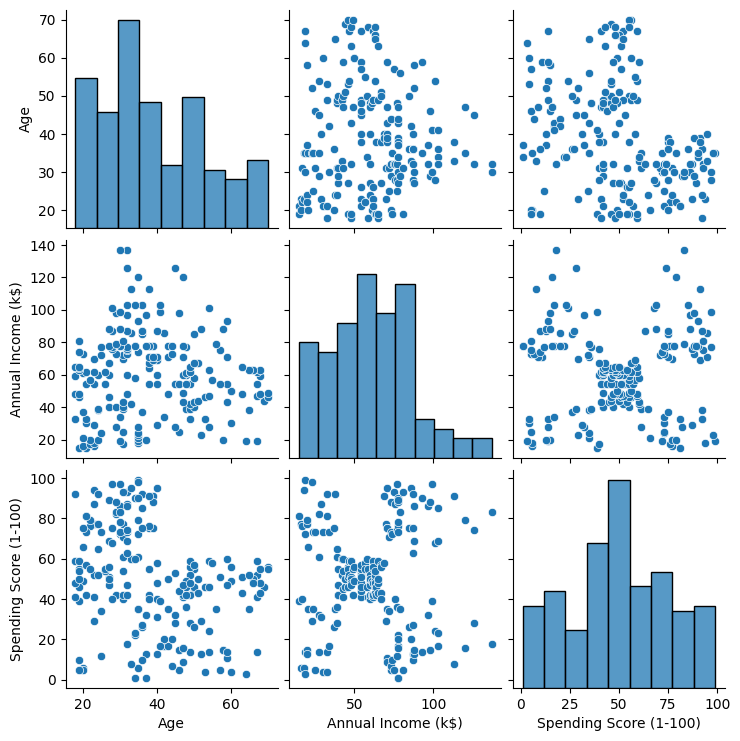

In [14]:
# Observar todas las relaciones entre todos los features, utilizar pairplot
sns.pairplot(df2)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

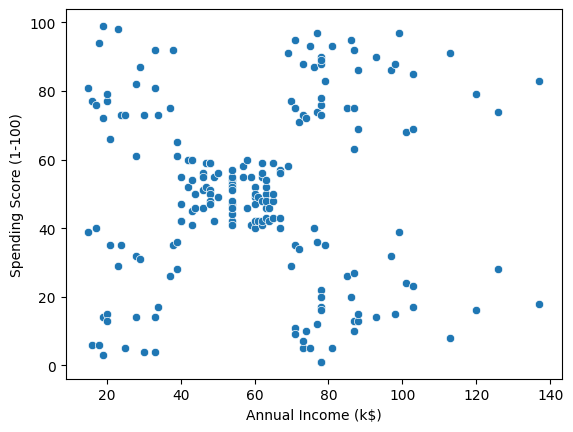

In [15]:
# Alumno: Se puede observar que donde se ve claramente una segmentación de grupos
# en en la relación de "Annual Income" y "Spending Socre"
# Graficar unicamente la relación x=Annual Income con y=SpendingScore
# con un scatter plot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [17]:
# Almuno: Crear un numpy array "X" con los features de entrada (Annual Income y Spending Score)
X = df2[['Annual Income (k$)', 'Spending Score (1-100)']]

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [35]:
# Almuno: Entrenar diferentes modelos de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def mejor_modelo(X, max_clusters = 10):
  n_clusters = list(range(2, max_clusters+1))
  ensayos = len(n_clusters)
  array_error = np.zeros((ensayos))
  array_score = np.zeros((ensayos))

  for i in range(ensayos):
    kmeans = KMeans(n_clusters=n_clusters[i], init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X)
    array_error[i] = kmeans.inertia_
    array_score[i] = silhouette_score(X, kmeans.labels_)

  return array_error, array_score, n_clusters


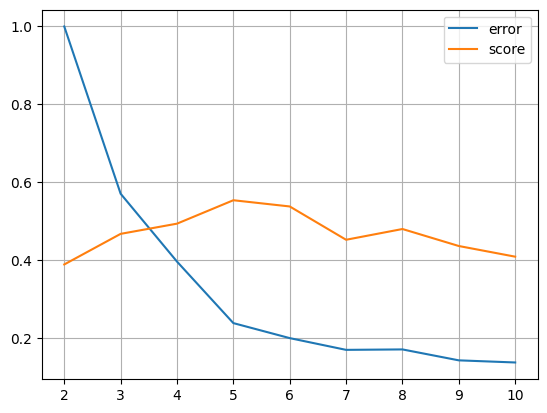

El mejor resultado se consigue con clusters= 5


In [37]:
# Dibujar la evolucion del error (inertia) y deteminar el
# punto de quiebre (elbow point) para deteminar el mejor k
def graficar_punto_codo(array_error, array_score, n_clusters):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.plot(n_clusters, array_error/array_error.max(), label='error')
  ax.plot(n_clusters, array_score, label='score')
  ax.grid('dashed')
  ax.legend()
  plt.show()

  best_cluster = n_clusters[array_score.argmax()]
  print('El mejor resultado se consigue con clusters=', best_cluster)

array_error, array_score, n_clusters = mejor_modelo(X)
graficar_punto_codo(array_error, array_score, n_clusters)

In [56]:
# Alumno: Entrenar el modelo con el mejor "K" encontrado
# y determinar los labels
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0, n_init='auto')
kmeans.fit(X)
labels = kmeans.predict(X)

In [57]:
# Alumno: Sumar la columna de labels con el nombre de custseg (customer segmentation)
# a su dataset
df2['custseg'] = labels
df2

,Age,Annual Income (k$),Spending Score (1-100),Clustering,custseg
0,19,15,39,2,2
1,21,15,81,4,4
2,20,16,6,5,5
3,23,16,77,4,4
4,31,17,40,2,2
...,...,...,...,...,...
195,35,120,79,6,6
196,45,126,28,0,0
197,32,126,74,6,6
198,32,137,18,0,0


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [58]:
# Alumno: Calcular la exactitud (accuracy) del modelo
silhouette_score(X, labels=kmeans.labels_)

0.4364031801876715

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

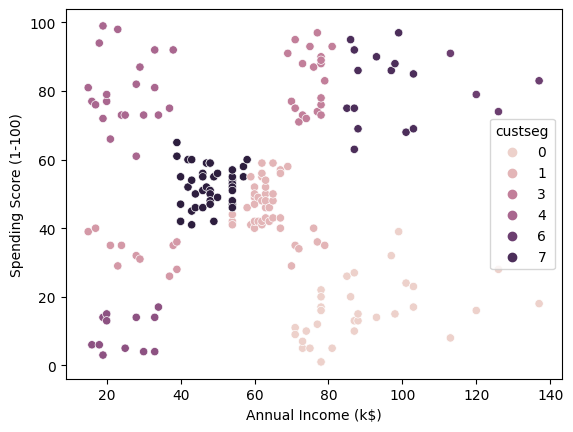

In [59]:
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg
sns.scatterplot(x=df2['Annual Income (k$)'], y=df2['Spending Score (1-100)'], hue=df2['custseg'])